In [136]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("./combined_seizure_reports.csv")
df.fillna(0, inplace=True)

group_df = []
groups = df.groupby('State/UT')
for state, group in groups:
    group.sort_values(["Date"], inplace=True)
    
    for col in ['Cash (Cr)','Liquor (Cr)', 'Drugs/ Narcotics (Cr)',
                'Precious Metals (Cr))', 'Other Items (Cr)', 'Total Seizure']:
    
        group[col + "_shift"] = group[col].shift(1)
        group.fillna(0, inplace=True)
        
        group["Daily " + col] = group[col].astype(float) - group[col + "_shift"].astype(float)
        del group[col + "_shift"]
    group_df.append(group)
            
print("done")

result = pd.concat(group_df, ignore_index=True, sort=False)

/Users/yashodhanjoglekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yashodhanjoglekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yashodhanjoglekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

done


In [137]:
result.head()

,ID,State/UT,Cash (Cr),Liquor (Lakh Lt),Liquor (Cr),Drugs/ Narcotics (Kg),Drugs/ Narcotics (Cr),Precious Metals (Kg),Precious Metals (Cr)),Other Items (Cr),Total Seizure,File,Date,Daily Cash (Cr),Daily Liquor (Cr),Daily Drugs/ Narcotics (Cr),Daily Precious Metals (Cr)),Daily Other Items (Cr),Daily Total Seizure
0,1.0,Andaman & Nicobar Islands (UT),0.020,0.00,0.052,0.0,0.063,0.0,0.0,0.0,0.13,seizure-report-as-on-29032019_1.csv,03/29/2019,0.020,0.052,0.063,0.0,0.0,0.13
1,1.0,Andaman & Nicobar Islands (UT),0.020,0.00,0.052,0.0,0.063,0.0,0.0,0.0,0.10,seizure-report-as-on-30032019_1.csv,03/30/2019,0.000,0.000,0.000,0.0,0.0,-0.03
2,1.0,Andaman & Nicobar Islands (UT),0.020,0.00,0.052,0.0,0.063,0.0,0.0,0.0,0.10,seizure-report-as-on-31032019_1.csv,03/31/2019,0.000,0.000,0.000,0.0,0.0,0.00
3,1.0,Andaman & Nicobar Islands (UT),0.062,0.09,0.059,0.0,0.063,0.0,0.0,0.0,0.10,seizure-report-as-on-01042019_1.csv,04/01/2019,0.042,0.007,0.000,0.0,0.0,0.00
4,1.0,Andaman & Nicobar Islands (UT),0.062,0.09,0.060,0.0,0.064,0.0,0.0,0.0,0.10,seizure-report-as-on-02042019_1.csv,04/02/2019,0.000,0.001,0.001,0.0,0.0,0.00


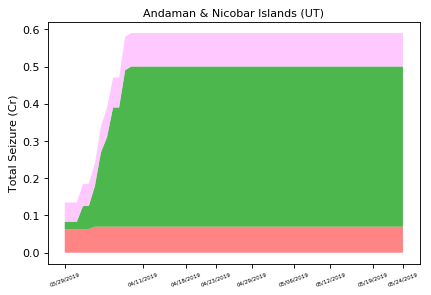

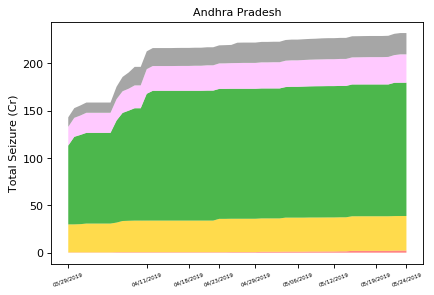

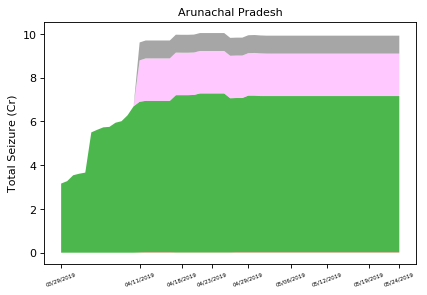

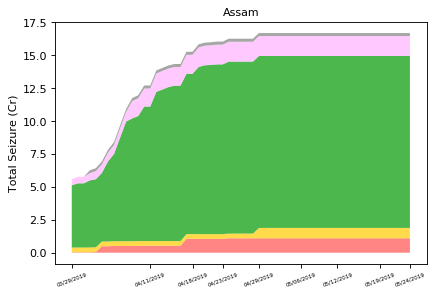

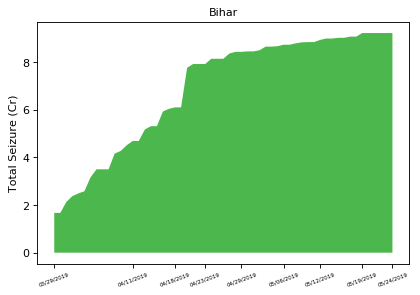

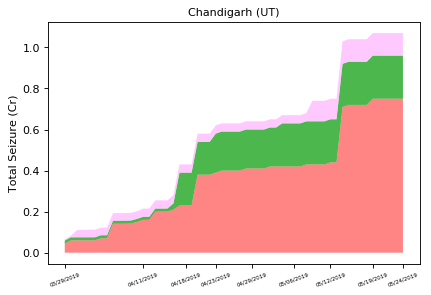

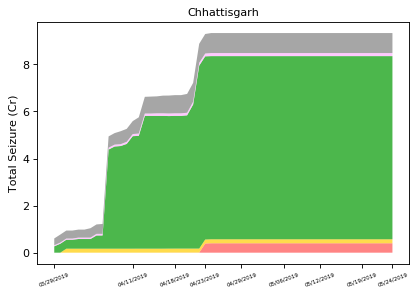

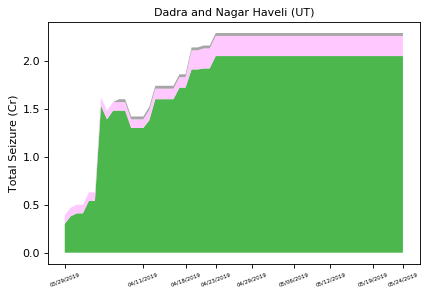

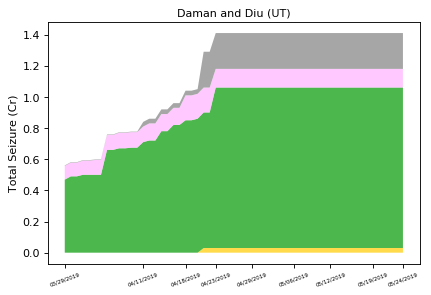

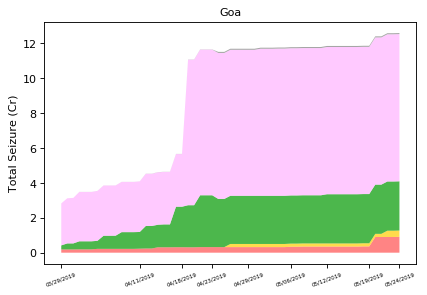

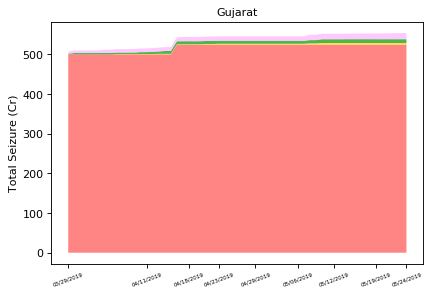

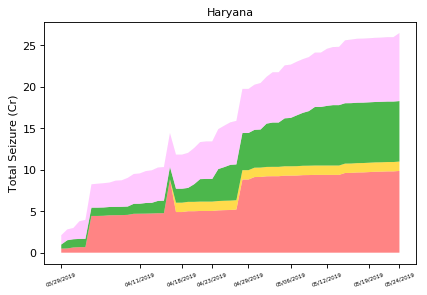

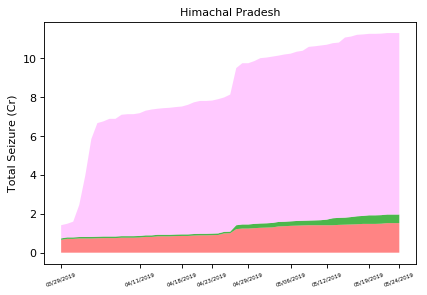

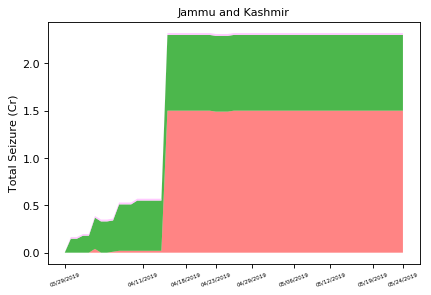

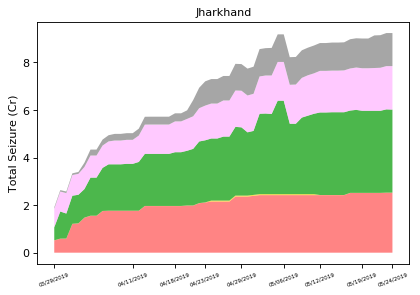

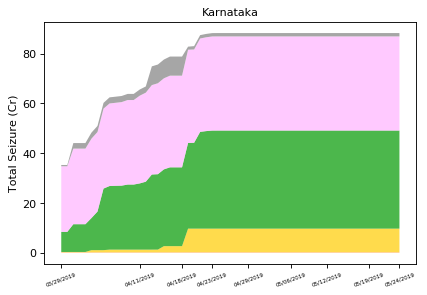

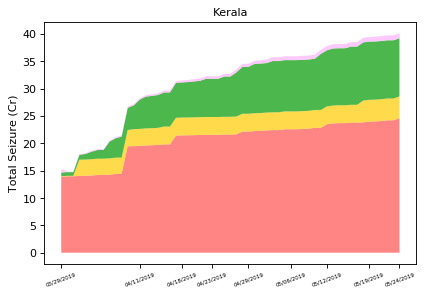

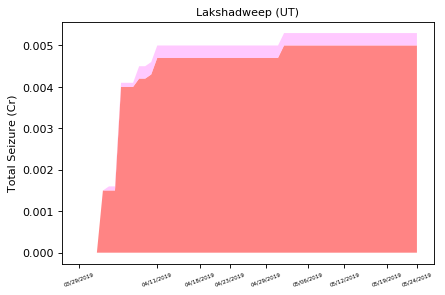

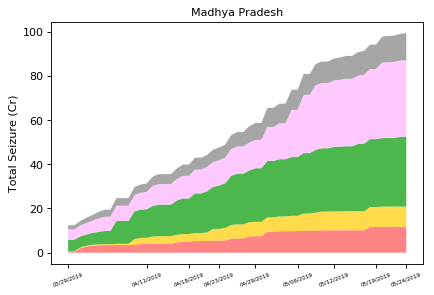

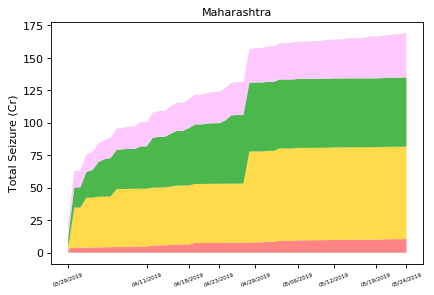

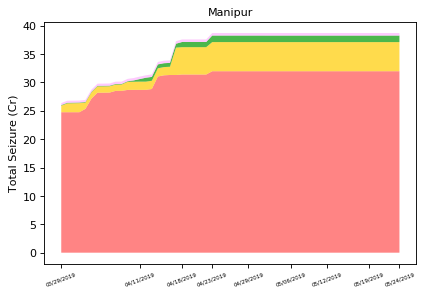

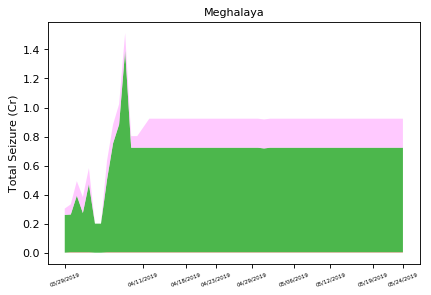

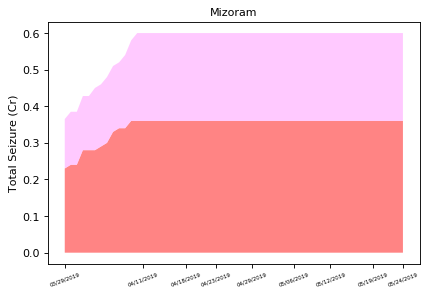

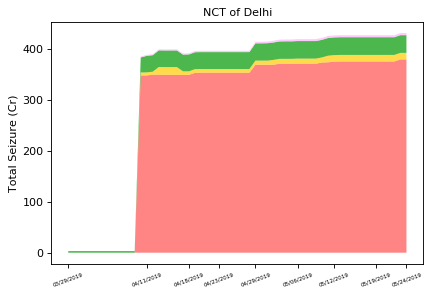

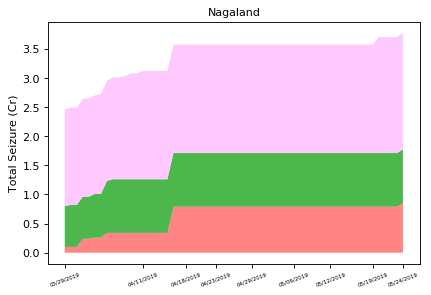

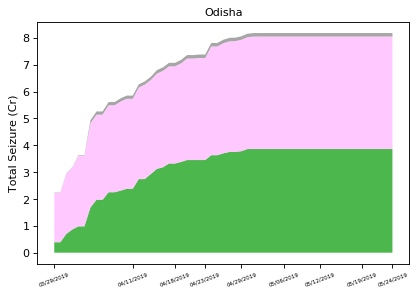

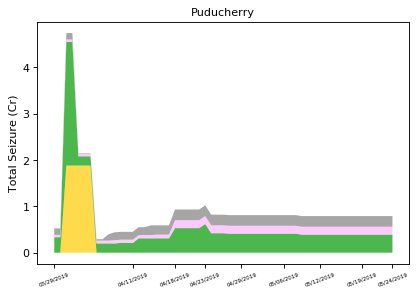

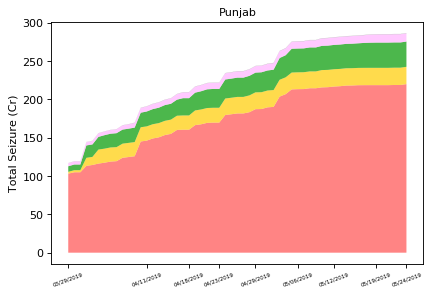

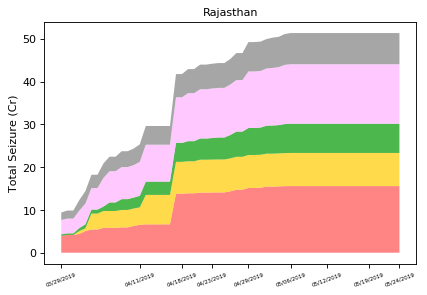

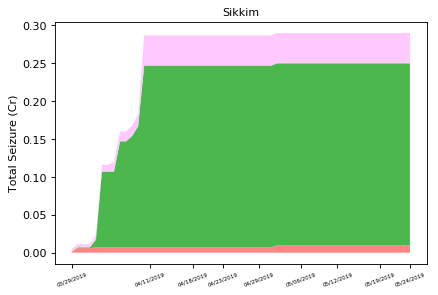

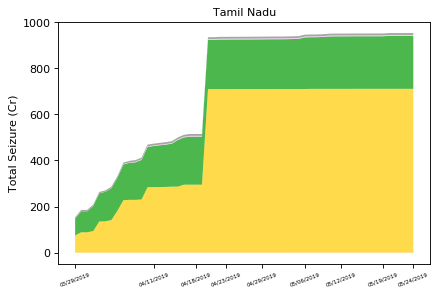

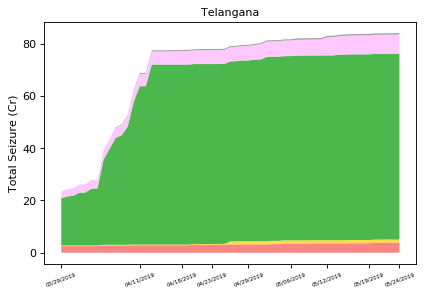

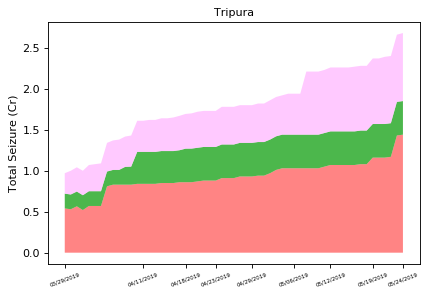

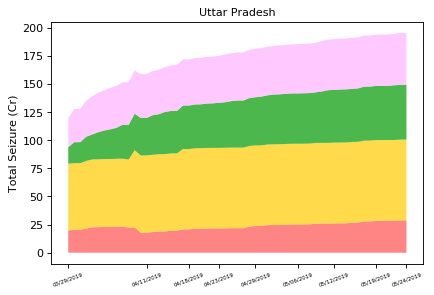

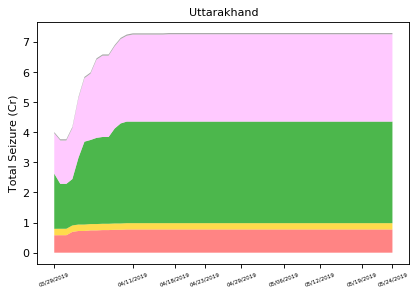

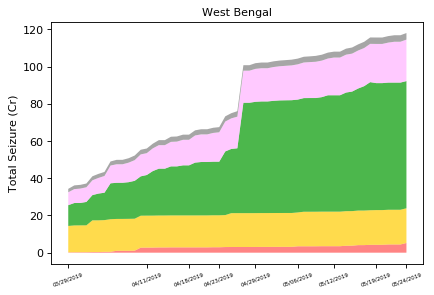

In [135]:
for state in result["State/UT"].unique():
    df_sub = result[result["State/UT"]==state]

    y = np.row_stack((df_sub["Drugs/ Narcotics (Cr)"], df_sub["Precious Metals (Cr))"], df_sub["Cash (Cr)"], df_sub["Liquor (Cr)"], df_sub["Other Items (Cr)"]))   
    x = df_sub["Date"] 
    y_stack = np.cumsum(y, axis=0)   # a 3x10 array

    fig = plt.figure(figsize=(6, 4),dpi=80)

    ax1 = fig.add_subplot(111)

    ax1.fill_between(x, 0, y_stack[0,:], facecolor="#ff5050", alpha=.7)
    ax1.fill_between(x, y_stack[0,:], y_stack[1,:], facecolor="#ffcc00", alpha=.7)
    ax1.fill_between(x, y_stack[1,:], y_stack[2,:], facecolor="#009900", alpha=.7)
    ax1.fill_between(x, y_stack[2,:], y_stack[3,:], facecolor="#ffb3ff", alpha=.7)
    ax1.fill_between(x, y_stack[3,:], y_stack[4,:], facecolor="#a6a6a6")

    my_xticks = ax1.get_xticks()
    
    # Set Polling Date labels
    plt.xticks([my_xticks[0],my_xticks[13],my_xticks[20], my_xticks[25], my_xticks[31], my_xticks[38], my_xticks[44],my_xticks[51], my_xticks[-1]], visible=True,size=5, rotation=20,)
    ax1.yaxis.label.set_size(5)
    plt.ylabel('Total Seizure (Cr)', fontsize=10)
    plt.title(state, fontsize=10)
    plt.savefig(state + '_plot.png')
    
    plt.show()

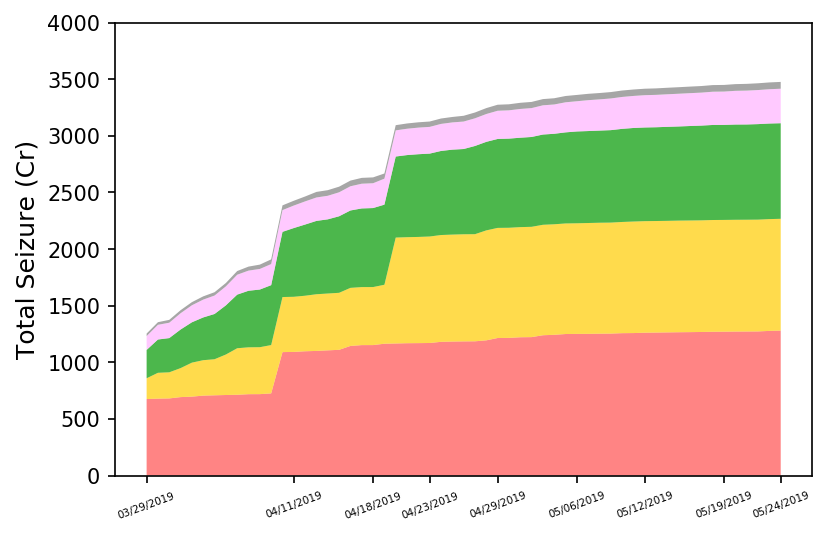

In [130]:
df_sub = result.groupby("Date").agg('sum')
df_sub.reset_index(inplace=True)

y = np.row_stack((df_sub["Drugs/ Narcotics (Cr)"], df_sub["Precious Metals (Cr))"], df_sub["Cash (Cr)"], df_sub["Liquor (Cr)"], df_sub["Other Items (Cr)"]))   
# this call to 'cumsum' (cumulative sum), passing in your y data, 
# is necessary to avoid having to manually order the datasets
x = df_sub["Date"] 
y_stack = np.cumsum(y, axis=0)   # a 3x10 array

fig = plt.figure(figsize=(6, 4),dpi=150)

ax1 = fig.add_subplot(111)
plt.ylim([0, 4000])

ax1.fill_between(x, 0, y_stack[0,:], facecolor="#ff5050", alpha=.7)
ax1.fill_between(x, y_stack[0,:], y_stack[1,:], facecolor="#ffcc00", alpha=.7)
ax1.fill_between(x, y_stack[1,:], y_stack[2,:], facecolor="#009900", alpha=.7)
ax1.fill_between(x, y_stack[2,:], y_stack[3,:], facecolor="#ffb3ff", alpha=.7)
ax1.fill_between(x, y_stack[3,:], y_stack[4,:], facecolor="#a6a6a6")

my_xticks = ax1.get_xticks()
plt.xticks([my_xticks[0],my_xticks[13],my_xticks[20], my_xticks[25], my_xticks[31], my_xticks[38], my_xticks[44],my_xticks[51], my_xticks[-1]], visible=True,size=5, rotation=20,)
ax1.yaxis.label.set_size(5)
plt.ylabel('Total Seizure (Cr)', fontsize=12)

plt.savefig("india" + '_plot.png')



plt.show()